Wine quality machine learning project based of winequality-white.csv dataset

**Reading data and importing all useful libraries**


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df1 = pd.read_csv(url,sep=';')

df2 = df1.head(150)

print("Example data")
print(df1.head(10))
df1.describe()

Example data
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6
5            8.1              0.28         0.40  ...       0.44     10.1        6
6            6.2              0.32         0.16  ...       0.47      9.6        6
7            7.0              0.27         0.36  ...       0.45      8.8        6
8            6.3              0.30         0.34  ...       0.49      9.5        6
9            8.1              0.22         0.43  ...       0.45     11.0        6

[10 rows x 12 columns]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


***First classification method KNN (k-Nearest Neighbors)***

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


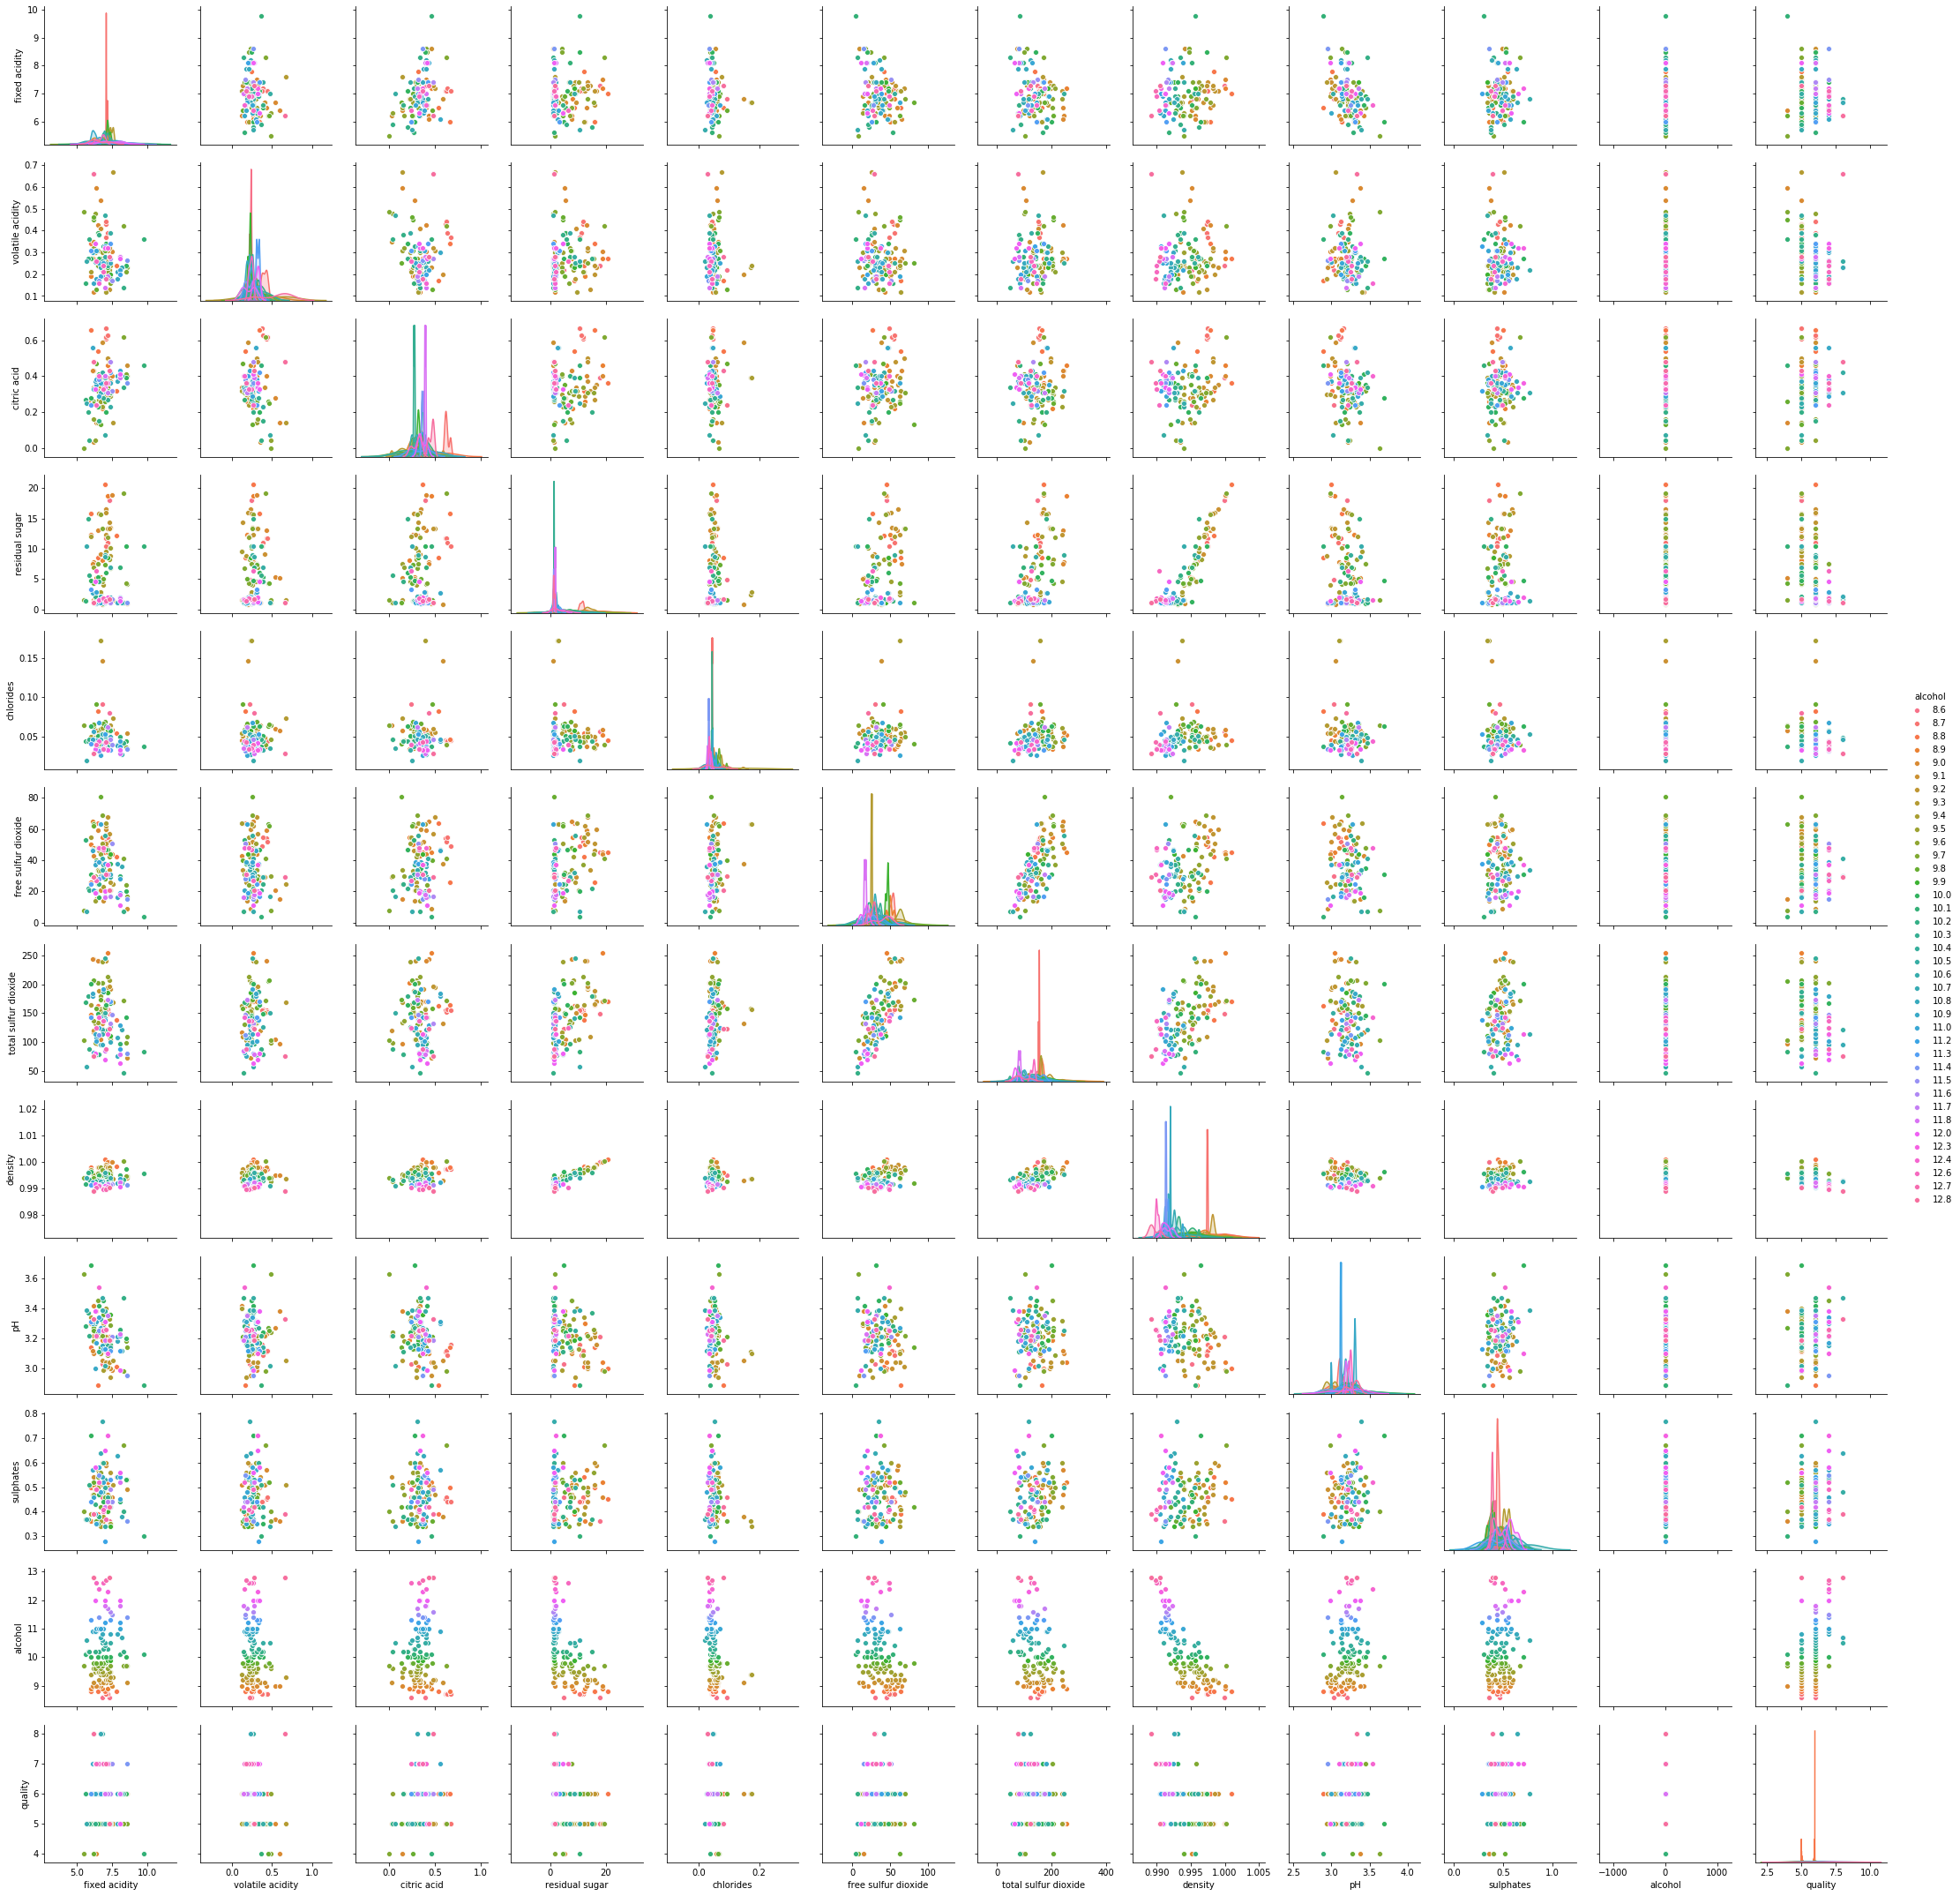

In [0]:
sns.pairplot(df2,hue="alcohol")

In [0]:
df1 = pd.melt(df1,id_vars=["alcohol"])

df1.head()

,alcohol,variable,value
0,8.8,variable,fixed acidity
1,9.5,variable,fixed acidity
2,10.1,variable,fixed acidity
3,9.9,variable,fixed acidity
4,9.9,variable,fixed acidity


In [14]:
train_data, test_data = np.split(df1,
                                  [len(df1)*7//10])
test_data = test_data.drop(labels='quality', axis=1)
print(len(train_data))
print(len(test_data))
test_data.head(10)


3428
1470


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3428,6.4,0.320,0.27,4.90,0.034,18.0,122.0,0.99160,3.36,0.71,12.5
3429,7.1,0.180,0.39,14.50,0.051,48.0,156.0,0.99947,3.35,0.78,9.1
3430,7.1,0.170,0.40,14.55,0.047,47.0,156.0,0.99945,3.34,0.78,9.1
3431,7.1,0.180,0.39,15.25,0.047,45.0,158.0,0.99946,3.34,0.77,9.1
3432,7.8,0.290,0.29,3.15,0.044,41.0,117.0,0.99153,3.24,0.35,11.5
3433,6.2,0.255,0.27,1.30,0.037,30.0,86.0,0.98834,3.05,0.59,12.9
3434,8.2,0.340,0.29,5.20,0.076,19.0,92.0,0.99138,2.95,0.39,12.5
3435,6.5,0.240,0.28,1.10,0.034,26.0,83.0,0.98928,3.25,0.33,12.3
3436,6.9,0.240,0.23,7.10,0.041,20.0,97.0,0.99246,3.10,0.85,11.4
3437,6.7,0.400,0.22,8.80,0.052,24.0,113.0,0.99576,3.22,0.45,9.4
